In [248]:
import pandas as pd

In [249]:
import pymssql
pymssql.__version__
'1.0.3'
#GrowAccountDb conn
conn = pymssql.connect(host='35.242.167.76',
database='GroDB_en-GB',
user='groDBeditUser',
password='cwy6KpE8QBM5Cjzc',)

# Data
data = pd.read_sql_query('''SELECT* FROM [dbo].[Faq.QuestionAnswer]''', conn)

In [320]:
data.head()

,Id,sortIndex,categoryId,question,answer,videoUrl
0,455,1,1,How do I change my notification settings?,"To change your notification settings, tap on t...",None
1,456,1,1,How do I change my email settings?,"To change your email settings, tap on the menu...",None
2,457,1,1,How do I change my email or password?,"To change your email or password, tap on the m...",None
3,458,1,1,How do I change my allergies?,"To change your allergens, tap on the menu butt...",None
4,459,1,1,How do I change my diet type?,"To change your diet type, tap on the menu butt...",None


In [251]:
sentences = data['question']

In [252]:
df1 = pd.DataFrame(sentences)

In [253]:
df1['intent'] = 'faq'

In [254]:
df1.columns = ['sentences', 'intent']
df1.tail()

,sentences,intent
150,"How do I report feedback, bugs or queries?",faq
151,Where is my data stored?,faq
152,Is my data secure?,faq
153,"Can I change the font type, size or colour?",faq
154,What does the app do with my data?,faq


# 2. INTENT: greet

In [255]:
greet1 = ["hi", "hey","heya", "hii", "hello", ""]
greet2 = ["how are you", "whatsup", "how you doing", "what are you doing", "howdy", ""]

In [256]:
greetings = []
for g1 in greet1:
    for g2 in greet2:
        greeting = g1+" "+g2
        greeting = " ".join(greeting.split())
        greetings.append(greeting)
        
greetings

['hi how are you',
 'hi whatsup',
 'hi how you doing',
 'hi what are you doing',
 'hi howdy',
 'hi',
 'hey how are you',
 'hey whatsup',
 'hey how you doing',
 'hey what are you doing',
 'hey howdy',
 'hey',
 'heya how are you',
 'heya whatsup',
 'heya how you doing',
 'heya what are you doing',
 'heya howdy',
 'heya',
 'hii how are you',
 'hii whatsup',
 'hii how you doing',
 'hii what are you doing',
 'hii howdy',
 'hii',
 'hello how are you',
 'hello whatsup',
 'hello how you doing',
 'hello what are you doing',
 'hello howdy',
 'hello',
 'how are you',
 'whatsup',
 'how you doing',
 'what are you doing',
 'howdy',
 '']

In [257]:
df2 = pd.DataFrame(greetings)

In [258]:
df2['intent'] = 'greet'
df2.columns = ['sentences', 'intent']
df2.head()

,sentences,intent
0,hi how are you,greet
1,hi whatsup,greet
2,hi how you doing,greet
3,hi what are you doing,greet
4,hi howdy,greet


# 3. INTENT: about_chatBot

In [330]:
# INTENT: smallTalk.boss
start = ['who']
verb = [ 'are', 'created', 'designed', 'made', 'programmed']
prefix = ['you']
about_chatbot = []
for s in start:
    for v in verb:
        for pr in prefix:
            sent = s+ " " +v+ " " +pr+ " "
            sent = " ".join(sent.split())
            about_chatbot.append(sent)
about_chatbot = pd.DataFrame(about_chatbot)

In [331]:
# # INTENT: smallTalk.about_chatbot
# start = ['are you', 'you are','you']
# verb = ['just', 'really']
# # extras = 'who are you', 'who created you', 'who designed you', 'who made you', 'who programmed you'
# # pronoun = ['me', '']
# prefix = ['a']
# about_chatbot = []
# for s in start:
#     for v in verb:
#         for pr in prefix:
#             sent = s+" "+v+" "+pr+" "+'chatbot'
#             sent = " ".join(sent.split())
#             about_chatbot.append(sent)
# about_chatbot= pd.DataFrame(about_chatbot)
# about_chatbot

In [332]:
extras = pd.DataFrame(['tell me about yourself','introduce yourself','can you introduce yourself','give me your itroduction','who are you','what are you', 'who created you','what are you', 'who designed you', 'who made you', 'who programmed you'])
extras

,0
0,tell me about yourself
1,introduce yourself
2,can you introduce yourself
3,give me your itroduction
4,who are you
5,what are you
6,who created you
7,what are you
8,who designed you
9,who made you


In [333]:
about_chatbot = pd.concat([about_chatbot,extras], axis = 0)
# about_chatbot

In [334]:
df3 = pd.DataFrame(about_chatbot)
df3['intent'] = 'about_chatbot'
df3.columns = ['sentences', 'intent']
len(df3)

16

# 4. INTENT: applause

In [325]:
# INTENT: smallTalk.smartness
# start = ['You are', 'you know', 'I know you are', 'I think you are']
# verb = ['very', 'really', 'too','']
# prefix = ['smart', 'intelligent', 'clever', 'brainy', 'genius','good', 'great']
# applause = []
# for s in start:
#     for v in verb:
#         for pr in prefix:
#             sent = s+ " " +v+ " " +pr+ ""
#             sent = " ".join(sent.split())
#             applause.append(sent)
# len(applause)

In [326]:
applause = ["Are you awesome?",
        "Aren't you awesome?",
        "but your answers are not bad",
        "haha that's interesting",
        "How much more awesome can you get?",
        "I am a fan",
        "I Am happy talking",
        "I Find happiness in talking",
        "I love the personality chatbot",
        "I Take great pleasure in speaking",
        "I think you are great",
        "I think you are incredible",
        "I think you're great",
        "I think you're incredible",
        "I think you're spectacular",
        "I'm a fan",
        "Impressive though.",
        "That is hilarious",
        "That was awesome",
        "That was cool",
        "That was funny",
        "That was great",
        "That was hilarious",
        "That was wonderful thanks for making me laugh!",
        "That's rad",
        "This brings me happiness",
        "u r alright",
        "u r funny",
        "What a great answer",
        "What a great response",
        "What a great thing to say",
        "What a perfect answer",
        "What a perfect response",
        "What an encouraging creature you are :)",
        "What cool thing to say",
        "Wow you're great!",
        "Wow, that shows more inteligence than expected",
        "Wow, you're fantastic!",
        "Wow, you're so great!",
        "You are amazing",
        "You are awesome!",
        "You are fantastic!",
        "You are funny",
        "You are funny :)",
        "You are hilarious",
        "You are nice!",
        "You are rad",
        "You are so funny",
        "You are so great",
        "You are spectacular",
        "You are stellar",
        "You are the bees knees",
        "You are the best",
        "You are top notch",
        "You are wonderful",
        "You're amazing",
        "You're awesome!",
        "You're funny",
        "You're funny :)",
        "You're hilarious",
        "You're nice!",
        "You're rad",
        "You're so funny",
        "You're spectacular",
        "You're the bees knees",
        "You're the best",
        "You're the best ever!",
        "You're top notch",
        "You're wonderful"]
len(applause)

69

In [265]:
df4 = pd.DataFrame(applause)
df4['intent'] = 'applause'
df4.columns = ['sentences', 'intent']

# 5. INTENT: Gratitude

In [266]:
gratitude = ["Thanks","Hey thanks", "thank you", "Okay thanks","ty", "thanks alot","cheers","awesome","great","briliant"]
df5 = pd.DataFrame(gratitude)
df5['intent'] = 'gratitude'
df5.columns = ['sentences', 'intent']

# 6. INTENT: about_user

In [267]:
# INTENT: smallTalk.about_user
start = ['I am', 'I was', 'am']
verb = ['very','just', 'really']
# pronoun = ['me', '']
prefix = ['bored', 'angry', 'tired', 'busy']
about_user = []
for s in start:
    for v in verb:
        for pr in prefix:
            sent = s+" "+v+" "+pr+" "
            sent = " ".join(sent.split())
            about_user.append(sent)
about_user

['I am very bored',
 'I am very angry',
 'I am very tired',
 'I am very busy',
 'I am just bored',
 'I am just angry',
 'I am just tired',
 'I am just busy',
 'I am really bored',
 'I am really angry',
 'I am really tired',
 'I am really busy',
 'I was very bored',
 'I was very angry',
 'I was very tired',
 'I was very busy',
 'I was just bored',
 'I was just angry',
 'I was just tired',
 'I was just busy',
 'I was really bored',
 'I was really angry',
 'I was really tired',
 'I was really busy',
 'am very bored',
 'am very angry',
 'am very tired',
 'am very busy',
 'am just bored',
 'am just angry',
 'am just tired',
 'am just busy',
 'am really bored',
 'am really angry',
 'am really tired',
 'am really busy']

In [268]:
df6 = pd.DataFrame(about_user)
df6['intent'] = 'about_user'
df6.columns = ['sentences', 'intent']

# 7. INTENT: annoyed

In [322]:
# INTENT: smallTalk.smartness
# start = ['You are', 'you know', 'I know you are', 'I think you are']
# verb = ['very', 'really', 'too']
# prefix = ['dumb', 'stupid', 'nonsense', 'trash', 'useless', 'bad', 'worse', 'not good', 'not useful','']
# annoyed = []
# for s in start:
#     for v in verb:
#         for pr in prefix:
#             sent = s+ " " +v+ " " +pr+ ""
#             sent = " ".join(sent.split())
#             annoyed.append(sent)
# annoyed

In [340]:
annoyed = ["You're lame",
        "I can't stand you",
        "I can't stand you anymore",
        "Because you are stupid",
        "Because you're an idiot",
        "UR idiot",
        "UR lame",
        "You are an idiot",
        "Alexa does a better job",
        "Alexa does a better job at this",
        "Alexa does a better job than you",
        "Alexa is better",
        "Alexa is superior",
        "Alexa is superior to you",
        "Alexa is way better",
        "Alexa is way better at this",
        "Alexa is way better than you",
        "Alexa is way smarter than you",
        "Are you a moron?",
        "Are you an idiot?",
        "Are you dumb?",
        "Are you slow?",
        "Are you stupid?",
        "Bixby does a better job",
        "Bixby does a better job at this",
        "Bixby does a better job than you",
        "Bixby is better",
        "Bixby is superior",
        "Bixby is superior to you",
        "Bixby is way better",
        "Bixby is way better at this",
        "Bixby is way better than you",
        "Bixby is way smarter than you",
        "Cortana does a better job",
        "Cortana does a better job at this",
        "Cortana does a better job than you",
        "Cortana is better",
        "Cortana is superior",
        "Cortana is superior to you",
        "Cortana is way better",
        "Cortana is way better at this",
        "Cortana is way better than you",
        "Cortana is way smarter than you",
        "Dumb",
        "Dummy",
        "Google Assistant does a better job",
        "Google Assistant does a better job at this",
        "Google Assistant does a better job than you",
        "Google Assistant is better",
        "Google Assistant is superior",
        "Google Assistant is superior to you",
        "Google Assistant is way better",
        "Google Assistant is way better at this",
        "Google Assistant is way better than you",
        "Google Assistant is way smarter than you",
        "How can you be so bad at this?",
        "Siri does a better job",
        "Siri does a better job at this",
        "Siri does a better job than you",
        "Siri is better",
        "Siri is superior",
        "Siri is superior to you",
        "Siri is way better",
        "Siri is way better at this",
        "Siri is way better than you",
        "Siri is way smarter than you",
        "That was awful",
        "That was dumb",
        "That was idiotic",
        "That was stupid",
        "Useless",
        "Why are you so annoying",
        "Why are you so bad at this",
        "Why are you so dumb",
        "Why are you so stupid",
        "Why are you the worst",
        "You are annoying",
        "You are bad at this",
        "You are dumb",
        "You are pretty dumb",
        "You are pretty much the worst",
        "You are pretty useless",
        "You are really annoying",
        "You are really dumb",
        "You are so annoying!",
        "You are so bad at this",
        "You are so dumb",
        "You are so worthless",
        "You are stupid",
        "You are the worst",
        "You are the worst bot",
        "You are useless",
        "You are worthless",
        "You do not know anything",
        "You don't know anything",
        "You're bad at this",
        "You're dumb",
        "You're pretty dumb",
        "You're pretty much the worst",
        "You're pretty useless",
        "You're really annoying",
        "You're really dumb",
        "You're so bad at this",
        "You're so worthless",
        "You're stupid",
        "You're terrible",
        "You're terrible at this",
        "You're the worst",
        "You're useless",
        "You're worthless",
        "I hate you"]
len(annoyed)

111

# Annoyed Response 

In [366]:
annoyed = pd.DataFrame(annoyed)
annoyed.column = 'sentences'
annoyed['response'] = annoyed['sentences'].str.replace(r"\You're.*?\',r)

In [ ]:
start = ['I', 'Sorry', "I'll",'I hope']
verb = ['very', 'really', 'too']
prefix = ['dumb', 'stupid', 'nonsense', 'trash', 'useless', 'bad', 'worse', 'not good', 'not useful','']
annoyed = []
for s in start:
    for v in verb:
        for pr in prefix:
            sent = s+ " " +v+ " " +pr+ ""
            sent = " ".join(sent.split())
            annoyed.append(sent)

In [341]:
df7 = pd.DataFrame(annoyed)
df7['intent'] = 'annoyed'
df7.columns = ['sentences', 'intent']

In [342]:
!ls

GrowBot.py                          data_intents.csv
Grow_intent_classification_v4.ipynb find_news.py
NER-Spacy-v2.ipynb                  helper.py
README.md                           member_en_gb
__pycache__                         models
check_name.py


# 8. INTENT: goodbye

In [343]:
goodbye = ['Okay Bye','Bye','Bye then','got to go','catch you later','Hey! Bye' 'GoodBye', 'Bye', 'ttyl', 'talk to you later', 'later then']
df8 = pd.DataFrame(goodbye)
df8['intent'] = 'goodbye'
df8.columns = ['sentences', 'intent']
df8.head()

,sentences,intent
0,Okay Bye,goodbye
1,Bye,goodbye
2,Bye then,goodbye
3,got to go,goodbye
4,catch you later,goodbye


# 9.INTENT: API calls

In [344]:
api_sentences = [
        'What’s the weather?','show me news?', 
        'news for today?',
        'find some news headlines',
        'tell me some news headlines', 
        'tell me some news headlines', 
        'show me some news headlines',
        'show me some news articles', 
        'find some news?',
        'find news',
        'show me latest headlines',
        'What are the latest news headlines today',
        'how’s the weather?','find weather condition?', 
        'find news regarding', 
        'tell todays headline',
        'tell me news regarding'
        ]
len(api_sentences)

17

In [345]:
df9 = pd.DataFrame(api_sentences)
df9['intent'] = 'API calls'
df9.columns = ['sentences', 'intent']
df9.head()

,sentences,intent
0,What’s the weather?,API calls
1,show me news?,API calls
2,news for today?,API calls
3,find some news headlines,API calls
4,tell me some news headlines,API calls


In [346]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9],axis=0)
# df10 cooktime

In [347]:
len(df)

503

In [348]:
# df.reset_index()
# df = df[['sentences', 'intent']]
# df.head()

In [349]:
df.size

1006

In [350]:
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
df['Label'] = Encode.fit_transform(df['intent'])

In [351]:
df.to_csv('data_intents.csv')

In [352]:
# df1 =  df[['intent', 'Label']]
# df1 = df1.drop_duplicates(subset='intent', keep='first')
labels = df['intent'].values
ids = df['Label'].values
idx2intent = {i:j for i, j in zip(ids, labels)}
idx2intent[3]

'annoyed'

In [353]:
idx2intent

{5: 'faq',
 8: 'greet',
 1: 'about_chatbot',
 4: 'applause',
 7: 'gratitude',
 2: 'about_user',
 3: 'annoyed',
 6: 'goodbye',
 0: 'API calls'}

# Intent_Label

In [354]:
df_check = df[df.Label == 3].head()
df_check.size

15

In [355]:
df[df.Label == 9].head()

,sentences,intent,Label


In [356]:
df.size

1509

In [357]:
df['Label'].value_counts()

5    155
4    112
3    111
8     36
2     36
0     17
1     16
7     10
6     10
Name: Label, dtype: int64

In [358]:
x = (df.sentences).values
y = df.Label

# Using Universal encoder word embedding 

In [287]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import re

In [288]:
import tensorflow as tf
import tensorflow_hub as hub

# Create graph and finalize.
g = tf.Graph()
with g.as_default():
    text_input = tf.placeholder(dtype=tf.string, shape=[None])
    embed = hub.Module("https://tfhub.dev/google/universal-sentence-encoder/2")
    embedded_text = embed(text_input)
    init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
    g.finalize()

# session created and initialized.
session = tf.Session(graph=g)
session.run(init_op)



INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# feed_dict

In [289]:
def word_embeddings(input_text):
    emb = session.run(embedded_text, feed_dict={text_input: input_text})
    return emb
    

In [290]:
emb_x = word_embeddings(x)
emb_x.shape

(512, 512)

In [291]:
tfidf = TfidfVectorizer()

# Train, Test split

In [292]:
df.size

1536

In [293]:
df.head()

,sentences,intent,Label
0,How do I change my notification settings?,faq,5
1,How do I change my email settings?,faq,5
2,How do I change my email or password?,faq,5
3,How do I change my allergies?,faq,5
4,How do I change my diet type?,faq,5


In [294]:
df['Label'].value_counts()

5    155
3    120
4    112
8     36
2     36
0     17
1     16
7     10
6     10
Name: Label, dtype: int64

In [295]:
x = df.sentences
y = df.Label

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tfidf = TfidfVectorizer()
x_new = tfidf.fit_transform(x)

# SMOTE: oversampling

In [297]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(emb_x, np.asarray(y))
# smox, smoy = US.fit_transform(numpy.asarray(emb_x), numpy.asarray(y))

In [298]:
X_resampled

array([[-0.04676855, -0.03560588, -0.05266801, ...,  0.03858261,
        -0.04418249, -0.04356415],
       [-0.04011138,  0.05144328, -0.04917402, ...,  0.07784535,
        -0.05638819,  0.02845401],
       [-0.01914971,  0.04597298, -0.03838475, ...,  0.07127811,
        -0.06256022,  0.04585271],
       ...,
       [-0.03107821, -0.00904371,  0.00807915, ..., -0.01936494,
        -0.06424652, -0.0186585 ],
       [-0.06338984, -0.0109645 , -0.01467667, ..., -0.0241338 ,
        -0.04448604,  0.0301362 ],
       [-0.02704996,  0.03160094, -0.0048815 , ..., -0.00545154,
        -0.08018502, -0.00430102]], dtype=float32)

In [299]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_new,y,random_state=1)

In [300]:
xtrain_resampled, ytrain_resampled = smote.fit_resample(x_train, np.asarray(y_train))

In [301]:
x_train.shape

(384, 376)

In [302]:
y_train.shape

(384,)

In [303]:
Labels = df['intent'].values
ids = df['Label'].values
idx2intent = {i:j for i, j in zip(ids, Labels)}
idx2intent[3]

'annoyed'

# Grid Search random forest

In [304]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score

In [305]:
# clf = RandomForestClassifier()

# parameters = {'n_estimators': [4, 6, 9], 
#               'max_features': ['log2', 'sqrt','auto'], 
#               'criterion': ['entropy', 'gini'],
#               'max_depth': [2, 3, 5, 10], 
#               'min_samples_split': [2, 3, 5],
#               'min_samples_leaf': [1,5,8]
#              }
# # scorer for estimator
# acc_scorer = make_scorer(accuracy_score)
# # grid_search
# grid_search= GridSearchCV(clf, parameters, scoring=acc_scorer)
# grid_search = grid_search.fit(xtrain_resampled, ytrain_resampled)
# # best_estimator
# clf= grid_search.best_estimator_
# # model fitted to best estimator
# rf_model = clf.fit(xtrain_resampled, ytrain_resampled)

In [306]:
# y_pred = rf_model.predict(x_test)
# # metrics.accuracy_score(y_test, y_pred)
# score1 = f1_score(y_test, y_pred, average=None)

In [307]:
# text = "hey"
# text = word_embeddings([text])
# pred = clf.predict(text)
# idx2intent[pred[0]]

# Random Forest

In [308]:
# rf = RandomForestClassifier(oob_score = True, random_state = 40)
# model = rf.fit(xtrain_resampled, ytrain_resampled)
# rf_pred = model.predict(x_test)
# metrics.accuracy_score(rf_pred, y_test)*100


In [309]:
# rf = RandomForestClassifier(oob_score = True, random_state = 40)
# model = rf.fit(x_train, y_train)
# test_pred = model.predict(x_train)
# metrics.accuracy_score(test_pred, y_train)*100

In [310]:
# print("User Input--->>>")
# new_text = input()
# new_text = word_embeddings([new_text])
# y_pred = rf.predict(new_text)
# y_pred
# print("predicted Intent---->>>")
# idx2intent[y_pred[0]]

In [311]:
# input_text = input()
# new_text = word_embeddings([input_text])
# y_pred = rf.predict(new_text)
# y_pred
# idx2intent[y_pred[0]]

# HyperParameter Tuning SVM

In [312]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [314]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = SVC(probability=True)
acc_scorer = make_scorer(accuracy_score)
# grid_search
grid_search = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_search = grid_search.fit(x_train, y_train)
# Set the clf to the best combination of parameters
clf = grid_search.best_estimator_
# Fit the best algorithm to the data. 
svm_model = clf.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
# metrics.accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred , average=None)
recall_score(y_test, y_pred,pos_label='positive',average='micro')

/Users/shubhamc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shubhamc/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shubhamc/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/shubhamc/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The de

0.96875

# Probablistic Tuning

In [315]:
def predict(new_text):
    new_text = tfidf.transform([new_text])
    y_pred = svm_model.predict(new_text)
    print(y_pred)
    pred_prob = svm_model.predict_proba(new_text)
    print(pred_prob)
    max_prob = np.amax(pred_prob)
    print(max_prob)
    if max_prob>=0.4:
        message=idx2intent[y_pred[0]]
    else:
        message="Sorry I don't have a response to that"
    return message

In [316]:
idx2intent

{5: 'faq',
 8: 'greet',
 1: 'about_chatbot',
 4: 'applause',
 7: 'gratitude',
 2: 'about_user',
 3: 'annoyed',
 6: 'goodbye',
 0: 'API calls'}

In [317]:
new_text=input()
predict(new_text)

how can I change my settings
[5]
[[0.0042932  0.0074445  0.00187656 0.00177034 0.00199766 0.96676669
  0.00286285 0.0046633  0.0083249 ]]
0.9667666895839987


'faq'

## SAVE MODEL

In [229]:
import pickle
pickle.dump(svm_model, open("models/Intent_Model/intent_classification_model.pkl", "wb" ) )
pickle.dump(idx2intent, open("models/Intent_Model/idx2intent.pkl", "wb" ) )

Dumped tuned svm model

In [231]:
score

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.95774648, 0.5       , 0.5       , 0.95238095])

f_1 score

In [232]:
import matplotlib.pyplot as plt

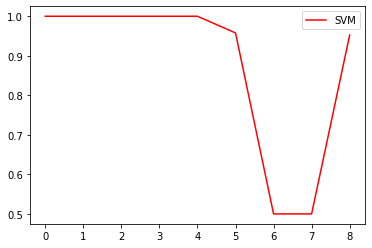

In [233]:
plt.plot(score, color='red',label='SVM')
plt.legend()
plt.show()


In [234]:
# import matplotlib.pyplot as plt
# plt.plot(score1, label='Random forest')
# plt.plot(score, color='red', label = 'SVM')
# plt.xlabel('F_1 score', size= 20)
# plt.legend()
# plt.rcParams["figure.figsize"] = (25,5)
# plt.show()

In [236]:
# text = input()
# text = word_embeddings([text])
# pred = svm_model.predict(text)
# idx2intent[pred[0]]

# SVM

In [237]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

In [238]:
clf = SVC(kernel='sigmoid', gamma=1,probability=True )
svm = clf.fit(x_train, y_train)
y_pred = svm.predict(x_test)
recall_score(y_test,y_pred,pos_label='positive',average='micro')

/Users/shubhamc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9609375

# Cross validation

In [243]:
from sklearn.model_selection import KFold
import numpy as np

y=y.reset_index(drop=True)
def run_kfold(clf):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    kf.get_n_splits(x)
    for train_index, test_index in kf.split(emb_x):
        print("TRAIN:", train_index, "TEST:", test_index)
        x_train, x_test = emb_x[train_index], emb_x[test_index]
        
        y_train, y_test = y[train_index], y[test_index]
        fit = svm_model.fit(x_train, y_train)
        predictions = fit.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 
        
run_kfold(clf)


TRAIN: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296

Fold 0 accuracy: 0.13725490196078433
Mean Accuracy: 0.7843137254901961
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 2

Fold 0 accuracy: 1.0
Mean Accuracy: 0.8676470588235294
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 2

In [230]:
print("\(-__-)/")

\(-__-)/
